In [1]:
import pandas as pd 
import os
import re 
pd.set_option('display.max_columns',None) 
pd.set_option('display.max_rows',None) 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')  

In [2]:
# file to large to include in the repo 

In [16]:
f_df = pd.read_csv('/Users/k/Desktop/Ironhack_prework_activities/FinalProject_eventtype/f_df_breakdown_files/f_df.csv')




In [17]:
f_df.shape

(456638, 75)

In [18]:
f_df.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'BEGIN_YEARMONTH', 'BEGIN_DAY',
       'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID_x',
       'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE',
       'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME',
       'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY',
       'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO',
       'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME',
       'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE',
       'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
       'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE',
       'Unnamed: 0_y', 'YEARMONTH', 'EPISODE_ID_y', 'LOCATION_INDEX', 'RANGE',
       'AZIMUTH', 'LOCATION', 'LATITUDE', 'L

In [19]:
# break down the merged data set (50MB) limit for GIT  
# ignore below 

f_df1 = f_df.filter(items=['Unnamed: 0', 'Unnamed: 0_x', 'BEGIN_YEARMONTH', 'BEGIN_DAY',
       'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID_x',
       'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE'])
f_df2 = f_df.filter(items=['CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME',
       'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'SOURCE', 'MAGNITUDE'])
f_df3 = f_df.filter(items=['MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY',
       'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO',
       'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME',
       'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE',
       'END_AZIMUTH'])
# the issue might be episode narrative and event narrative since its a paragraph 
f_df4 = f_df.filter(items=['END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',]) 
f_df4_=f_df.filter(items=['END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE'])

f_df5 = f_df.filter(items=['DATA_SOURCE',
       'Unnamed: 0_y', 'YEARMONTH', 'EPISODE_ID_y', 'LOCATION_INDEX', 'RANGE',
       'AZIMUTH', 'LOCATION'])

f_df6 = f_df.filter(items=['LATITUDE', 'LONGITUDE', 'LAT2', 'LON2',
       'Unnamed: 0.1', 'FAT_YEARMONTH', 'FAT_DAY', 'FAT_TIME', 'FATALITY_ID',
       'FATALITY_TYPE', 'FATALITY_DATE', 'FATALITY_AGE', 'FATALITY_SEX',
       'FATALITY_LOCATION', 'EVENT_YEARMONTH'])


In [20]:
#ignore below 

f_df1.to_csv('/Users/k/Desktop/FinalProject_eventtype/End_Of_Semester_Proj/f_df1.csv') 
f_df2.to_csv('/Users/k/Desktop/FinalProject_eventtype/End_Of_Semester_Proj/f_df2.csv') 
f_df3.to_csv('/Users/k/Desktop/FinalProject_eventtype/End_Of_Semester_Proj/f_df3.csv') 
# f_df4 remains to large keep breaking it down 
f_df4.to_csv('/Users/k/Desktop/FinalProject_eventtype/End_Of_Semester_Proj/f_df4.csv') 
f_df4_.to_csv('/Users/k/Desktop/FinalProject_eventtype/End_Of_Semester_Proj/f_df4_.csv') 
#--
f_df5.to_csv('/Users/k/Desktop/FinalProject_eventtype/End_Of_Semester_Proj/f_df5.csv') 
f_df6.to_csv('/Users/k/Desktop/FinalProject_eventtype/End_Of_Semester_Proj/f_df6.csv') 



# Check out the data

In [21]:
f_df.head() 

,Unnamed: 0,Unnamed: 0_x,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID_x,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,Unnamed: 0_y,YEARMONTH,EPISODE_ID_y,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2,Unnamed: 0.1,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
0,0,7,200802,5,1615,200802,5,1615,12469,68371,ARKANSAS,5,2008,February,Hail,C,127,SCOTT,LZK,05-FEB-08 16:15:00,CST-6,05-FEB-08 16:15:00,0,0,0,0,0.00K,0.00K,Law Enforcement,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N,HON,0.0,N,HON,34.930,-94.1800,34.9300,-94.1800,"Early on the 5th, a strong storm system approa...",NaN,CSV,4239,200802,12469,1,0.00,N,HON,34.9300,-94.1800,3455800,9410800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,8,200801,8,1320,200801,8,1320,11835,67398,ARKANSAS,5,2008,January,Thunderstorm Wind,C,95,MONROE,LZK,08-JAN-08 13:20:00,CST-6,08-JAN-08 13:20:00,0,0,0,0,NaN,NaN,Law Enforcement,50.00,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N,HOLLY GROVE,0.0,N,HOLLY GROVE,34.600,-91.2000,34.6000,-91.2000,Severe thunderstorms affected a large part of ...,Trees and power lines were blown down.,CSV,6797,200801,11835,1,0.00,N,HOLLY GROVE,34.6000,-91.2000,3436000,9112000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,9,200801,28,300,200801,28,500,12423,68005,ARIZONA,4,2008,January,Flood,C,19,PIMA,TWC,28-JAN-08 03:00:00,MST-7,28-JAN-08 05:00:00,0,0,0,0,0.00K,0.00K,Newspaper,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,W,CASCABEL,38.0,W,CASCABEL,32.375,-111.0101,32.3691,-111.0156,A trough of low pressure off the Western U.S. ...,A swift water rescue occurred about 4 am at th...,CSV,5667,200801,12423,1,37.72,W,CASCABEL,32.3750,-111.0101,3222500,111606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,9,200801,28,300,200801,28,500,12423,68005,ARIZONA,4,2008,January,Flood,C,19,PIMA,TWC,28-JAN-08 03:00:00,MST-7,28-JAN-08 05:00:00,0,0,0,0,0.00K,0.00K,Newspaper,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,W,CASCABEL,38.0,W,CASCABEL,32.375,-111.0101,32.3691,-111.0156,A trough of low pressure off the Western U.S. ...,A swift water rescue occurred about 4 am at th...,CSV,5668,200801,12423,2,37.47,W,CASCABEL,32.3746,-111.0057,3222476,111342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,9,200801,28,300,200801,28,500,12423,68005,ARIZONA,4,2008,January,Flood,C,19,PIMA,TWC,28-JAN-08 03:00:00,MST-7,28-JAN-08 05:00:00,0,0,0,0,0.00K,0.00K,Newspaper,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,W,CASCABEL,38.0,W,CASCABEL,32.375,-111.0101,32.3691,-111.0156,A trough of low pressure off the Western U.S. ...,A swift water rescue occurred about 4 am at th...,CSV,5669,200801,12423,3,37.82,W,CASCABEL,32.3661,-111.0131,3221966,111786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
f_df['EVENT_TYPE'].value_counts()

Thunderstorm Wind           129809
Flash Flood                 107791
Hail                         87578
Flood                        77377
Tornado                      19849
Marine Thunderstorm Wind     13599
Heavy Rain                    9747
Lightning                     4083
Funnel Cloud                  2685
Waterspout                    1767
Debris Flow                   1511
Marine High Wind               353
Marine Hail                    281
Marine Strong Wind             107
Dust Devil                     101
Name: EVENT_TYPE, dtype: int64

In [25]:
rows = f_df.shape[0]
columns = f_df.shape[1] 
print("rows:", rows)
print("columns",columns)

rows: 456638
columns 75


In [26]:
type(f_df)

pandas.core.frame.DataFrame

In [27]:
f_df.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'BEGIN_YEARMONTH', 'BEGIN_DAY',
       'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID_x',
       'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE',
       'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME',
       'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY',
       'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO',
       'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME',
       'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE',
       'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
       'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE',
       'Unnamed: 0_y', 'YEARMONTH', 'EPISODE_ID_y', 'LOCATION_INDEX', 'RANGE',
       'AZIMUTH', 'LOCATION', 'LATITUDE', 'L

# Columns to drop 

In [28]:
f_df = f_df.drop(['TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO',
       'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME'],axis=1) 
f_df = f_df.drop(['Unnamed: 0', 'Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0.1'],axis=1) 
f_df = f_df.drop(['FAT_YEARMONTH', 'FAT_DAY',
       'FAT_TIME', 'FATALITY_ID', 'FATALITY_TYPE', 'FATALITY_DATE',
       'FATALITY_AGE', 'FATALITY_SEX', 'FATALITY_LOCATION', 'EVENT_YEARMONTH'],axis=1) 
f_df = f_df.drop(['SOURCE','DATA_SOURCE'],axis=1) 
f_df = f_df.drop(['EPISODE_ID_y'],axis=1) 
f_df = f_df.drop(['EPISODE_NARRATIVE','EVENT_NARRATIVE'],axis=1) 
f_df = f_df.drop(['CATEGORY'],axis=1)

## lower

In [29]:
f_df.columns= f_df.columns.str.lower() 

In [30]:
f_df.head(2)

,begin_yearmonth,begin_day,begin_time,end_yearmonth,end_day,end_time,episode_id_x,event_id,state,state_fips,year,month_name,event_type,cz_type,cz_fips,cz_name,wfo,begin_date_time,cz_timezone,end_date_time,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,damage_property,damage_crops,magnitude,magnitude_type,flood_cause,begin_range,begin_azimuth,begin_location,end_range,end_azimuth,end_location,begin_lat,begin_lon,end_lat,end_lon,yearmonth,location_index,range,azimuth,location,latitude,longitude,lat2,lon2
0,200802,5,1615,200802,5,1615,12469,68371,ARKANSAS,5,2008,February,Hail,C,127,SCOTT,LZK,05-FEB-08 16:15:00,CST-6,05-FEB-08 16:15:00,0,0,0,0,0.00K,0.00K,1.75,NaN,NaN,0.0,N,HON,0.0,N,HON,34.93,-94.18,34.93,-94.18,200802,1,0.0,N,HON,34.93,-94.18,3455800,9410800
1,200801,8,1320,200801,8,1320,11835,67398,ARKANSAS,5,2008,January,Thunderstorm Wind,C,95,MONROE,LZK,08-JAN-08 13:20:00,CST-6,08-JAN-08 13:20:00,0,0,0,0,NaN,NaN,50.00,EG,NaN,0.0,N,HOLLY GROVE,0.0,N,HOLLY GROVE,34.60,-91.20,34.60,-91.20,200801,1,0.0,N,HOLLY GROVE,34.60,-91.20,3436000,9112000


# drop

In [31]:
# check time columns  
# keep event id 
f_df=f_df.drop(['begin_yearmonth','event_id','begin_date_time','yearmonth','begin_lon'],axis=1)
f_df=f_df.drop(['end_yearmonth','episode_id_x','cz_timezone','end_date_time'],axis=1)
f_df = f_df.drop(['lat2','lon2'],axis=1) 
f_df = f_df.drop(['location'],axis=1)
f_df['duration']= f_df['end_day']- f_df['begin_day']
f_df =f_df.drop(['end_day','begin_day'],axis=1)



# Clean Property damage & crops

In [32]:
#f_df_['damage_property_money']
def clean_money(x):
    if pd.isna(x)== True:
        return x
    else:
        if 'K' in x:
            x = x.strip('K')
            x = float(x)*10000
            return x 
        elif 'M' in x:
            x = x.strip('M')
            x = float(x)*1000000
            return x  
        elif 'B' in x:
            x = x.strip('B')
            x = float(x)*1000000000 
            return x
        else:
            return(0)

In [33]:
f_df['damage_property_a']=list(map(clean_money,f_df['damage_property']))
f_df['damage_crops_a']=list(map(clean_money,f_df['damage_crops']))

## drop

In [34]:
f_df = f_df.drop(['damage_property','damage_crops'],axis=1) 
f_df = f_df.drop(['azimuth','begin_range'],axis=1)

# Check Nan's
- over 90 % drop

In [35]:

pd.DataFrame(f_df.isna().sum()/len(f_df)) 
f_df.shape 
len(f_df.columns) 
f_df.head(3)

,begin_time,end_time,state,state_fips,year,month_name,event_type,cz_type,cz_fips,cz_name,wfo,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,magnitude,magnitude_type,flood_cause,begin_azimuth,begin_location,end_range,end_azimuth,end_location,begin_lat,end_lat,end_lon,location_index,range,latitude,longitude,duration,damage_property_a,damage_crops_a
0,1615,1615,ARKANSAS,5,2008,February,Hail,C,127,SCOTT,LZK,0,0,0,0,1.75,NaN,NaN,N,HON,0.0,N,HON,34.930,34.9300,-94.1800,1,0.00,34.930,-94.1800,0,0.0,0.0
1,1320,1320,ARKANSAS,5,2008,January,Thunderstorm Wind,C,95,MONROE,LZK,0,0,0,0,50.00,EG,NaN,N,HOLLY GROVE,0.0,N,HOLLY GROVE,34.600,34.6000,-91.2000,1,0.00,34.600,-91.2000,0,NaN,NaN
2,300,500,ARIZONA,4,2008,January,Flood,C,19,PIMA,TWC,0,0,0,0,NaN,NaN,Heavy Rain,W,CASCABEL,38.0,W,CASCABEL,32.375,32.3691,-111.0156,1,37.72,32.375,-111.0101,0,0.0,0.0


# Fill Nan

- magnitude 0.492537
- magnitude_type 0.684941
- flood_cause 0.591188

### Flood_cause cleaning

In [36]:
f_df['flood_cause'].value_counts()

Heavy Rain                      164684
Heavy Rain / Snow Melt           12083
Heavy Rain / Tropical System      6430
Ice Jam                           1325
Heavy Rain / Burn Area            1268
Dam / Levee Break                  525
Planned Dam Release                364
Name: flood_cause, dtype: int64

In [37]:
len(f_df[f_df['flood_cause'].isna()==True])
f_df['flood_cause']= f_df['flood_cause'].fillna('Heavy Rain')

### Magnitude_type cleaning 

In [38]:
f_df['magnitude_type'].value_counts() 
# should you be filling in the value type ?????????
# ERROR

EG    117211
MG     26579
ES        56
MS        22
Name: magnitude_type, dtype: int64

In [39]:
f_df['magnitude_type'].unique()

array([nan, 'EG', 'MG', 'MS', 'ES'], dtype=object)

In [40]:
len(f_df[f_df['magnitude_type'].isna()==True])
f_df['magnitude_type']= f_df['magnitude_type'].fillna('EG')


### Magnitude Cleaning 

In [41]:
f_df['magnitude'].value_counts()

50.00     48330
1.00      32388
52.00     27938
0.75      15112
0.88      12803
1.75      11877
55.00      9198
61.00      8859
56.00      8795
1.25       5385
60.00      4921
1.50       4374
65.00      3499
70.00      2796
34.00      2277
53.00      2218
2.00       2092
54.00      2080
51.00      2057
35.00      1862
43.00      1665
2.75       1458
36.00      1455
37.00      1345
39.00      1260
45.00      1186
2.50       1174
57.00      1154
40.00      1142
38.00       912
58.00       788
59.00       668
41.00       653
78.00       647
63.00       582
42.00       542
74.00       486
48.00       475
62.00       408
44.00       396
3.00        382
87.00       304
46.00       293
49.00       255
47.00       248
64.00       243
66.00       221
75.00       194
67.00       188
68.00       179
83.00       174
4.25        156
69.00       138
0.25        115
4.00        106
2.25         98
80.00        95
72.00        82
4.50         79
71.00        79
96.00        72
76.00        71
73.00   

In [42]:
f_df['magnitude'].median()

50.0

In [43]:
len(f_df[f_df['magnitude'].isna()==True])
f_df['magnitude']= f_df['magnitude'].fillna('50.0')

In [44]:
f_df['magnitude'] = f_df['magnitude'].astype(np.float64)

In [45]:
### Property damage/crop damage nan cleaning 

In [46]:
med_property = f_df['damage_property_a'].median() 
med_crops = f_df['damage_crops_a'].median() 
print('median: ',med_property) 
print('median: ',med_crops)

median:  0.0
median:  0.0


In [47]:
len(f_df['damage_property_a'].isna()==True) 
f_df['damage_property_a']=f_df['damage_property_a'].fillna('0.0')

In [48]:
len(f_df['damage_crops_a'].isna()==True) 
f_df['damage_crops_a']=f_df['damage_crops_a'].fillna('0.0')

### Check the percentage of nans 

In [49]:
pd.DataFrame(f_df.isna().sum()/len(f_df))

,0
begin_time,0.0
end_time,0.0
state,0.0
state_fips,0.0
year,0.0
month_name,0.0
event_type,0.0
cz_type,0.0
cz_fips,0.0
cz_name,0.0


# Dtypes

In [54]:
f_df.dtypes 

begin_time             int64
end_time               int64
state                 object
state_fips             int64
year                   int64
month_name            object
event_type            object
cz_type               object
cz_fips                int64
cz_name               object
wfo                   object
injuries_direct        int64
injuries_indirect      int64
deaths_direct          int64
deaths_indirect        int64
magnitude            float64
magnitude_type        object
flood_cause           object
begin_azimuth         object
begin_location        object
end_range            float64
end_azimuth           object
end_location          object
begin_lat            float64
end_lat              float64
end_lon              float64
location_index         int64
range                float64
latitude             float64
longitude            float64
duration               int64
damage_property_a    float64
damage_crops_a       float64
dtype: object

In [55]:
f_df.head()

,begin_time,end_time,state,state_fips,year,month_name,event_type,cz_type,cz_fips,cz_name,wfo,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,magnitude,magnitude_type,flood_cause,begin_azimuth,begin_location,end_range,end_azimuth,end_location,begin_lat,end_lat,end_lon,location_index,range,latitude,longitude,duration,damage_property_a,damage_crops_a
0,1615,1615,ARKANSAS,5,2008,February,Hail,C,127,SCOTT,LZK,0,0,0,0,1.75,EG,Heavy Rain,N,HON,0.0,N,HON,34.930,34.9300,-94.1800,1,0.00,34.9300,-94.1800,0,0.0,0.0
1,1320,1320,ARKANSAS,5,2008,January,Thunderstorm Wind,C,95,MONROE,LZK,0,0,0,0,50.00,EG,Heavy Rain,N,HOLLY GROVE,0.0,N,HOLLY GROVE,34.600,34.6000,-91.2000,1,0.00,34.6000,-91.2000,0,0.0,0.0
2,300,500,ARIZONA,4,2008,January,Flood,C,19,PIMA,TWC,0,0,0,0,50.00,EG,Heavy Rain,W,CASCABEL,38.0,W,CASCABEL,32.375,32.3691,-111.0156,1,37.72,32.3750,-111.0101,0,0.0,0.0
3,300,500,ARIZONA,4,2008,January,Flood,C,19,PIMA,TWC,0,0,0,0,50.00,EG,Heavy Rain,W,CASCABEL,38.0,W,CASCABEL,32.375,32.3691,-111.0156,2,37.47,32.3746,-111.0057,0,0.0,0.0
4,300,500,ARIZONA,4,2008,January,Flood,C,19,PIMA,TWC,0,0,0,0,50.00,EG,Heavy Rain,W,CASCABEL,38.0,W,CASCABEL,32.375,32.3691,-111.0156,3,37.82,32.3661,-111.0131,0,0.0,0.0


In [56]:
#f_df.select_dtypes(np.number)

In [57]:
#'damage_property','damage_crops' 
f_df['damage_property_a'] = f_df['damage_property_a'].astype(np.float64)
f_df['damage_crops_a'] = f_df['damage_crops_a'].astype(np.float64)

In [58]:
f_df.dtypes

begin_time             int64
end_time               int64
state                 object
state_fips             int64
year                   int64
month_name            object
event_type            object
cz_type               object
cz_fips                int64
cz_name               object
wfo                   object
injuries_direct        int64
injuries_indirect      int64
deaths_direct          int64
deaths_indirect        int64
magnitude            float64
magnitude_type        object
flood_cause           object
begin_azimuth         object
begin_location        object
end_range            float64
end_azimuth           object
end_location          object
begin_lat            float64
end_lat              float64
end_lon              float64
location_index         int64
range                float64
latitude             float64
longitude            float64
duration               int64
damage_property_a    float64
damage_crops_a       float64
dtype: object

In [59]:
# corr matrix

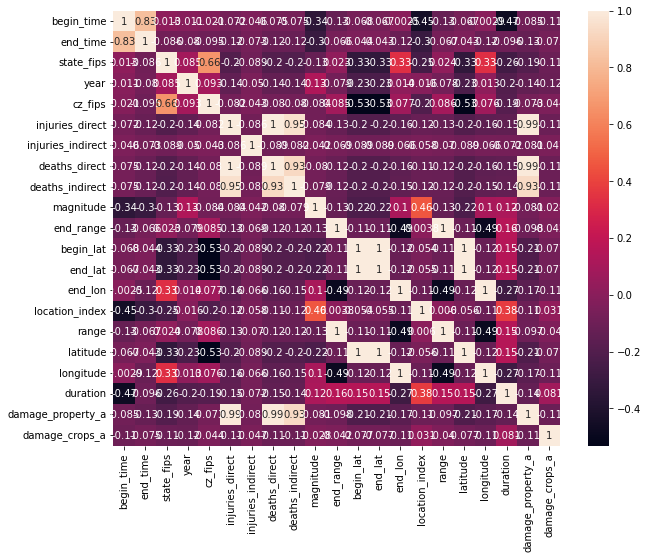

In [60]:
df_corr =f_df.corr()
corr_matrix=df_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

## Drop

In [61]:
f_df=f_df.drop(['end_time','damage_property_a'],axis=1) 
f_df=f_df.drop(['begin_lat','end_range','end_lon'],axis=1)

In [62]:
len(f_df.columns)

28

## Check matrix again

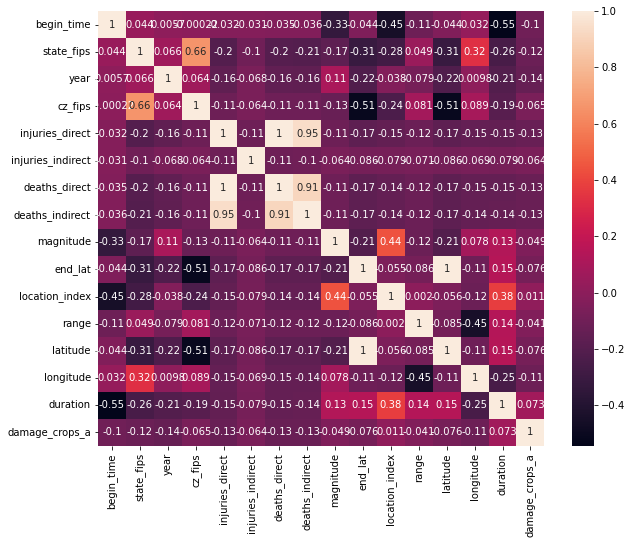

In [63]:
df_corr =f_df.corr()
corr_matrix=df_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

## Check categorical value counts before scaling

In [64]:
cat = f_df.select_dtypes(np.object)
x=cat.columns 
for xs in x:
    values = pd.DataFrame(f_df[xs].value_counts())
    print(values)

                      state
TEXAS                 28424
MISSOURI              24066
KANSAS                18441
ILLINOIS              18248
IOWA                  17724
VIRGINIA              17475
KENTUCKY              17427
NORTH CAROLINA        15073
ARKANSAS              13873
OHIO                  13335
PENNSYLVANIA          13308
GEORGIA               13287
NEW YORK              12891
INDIANA               12837
NEBRASKA              12713
ALABAMA               12212
OKLAHOMA              12092
MISSISSIPPI           11612
SOUTH DAKOTA          11363
TENNESSEE             10443
SOUTH CAROLINA         9649
MINNESOTA              9620
FLORIDA                9590
WISCONSIN              8510
MARYLAND               7602
LOUISIANA              6940
CALIFORNIA             6789
WEST VIRGINIA          6468
NEW JERSEY             6384
COLORADO               5744
NORTH DAKOTA           5657
MICHIGAN               5166
GULF OF MEXICO         5143
ATLANTIC NORTH         5126
MASSACHUSETTS       

                                                  begin_location
SPRINGFIELD                                                  519
COLUMBIA                                                     438
MADISON                                                      437
MT VERNON                                                    424
AUGUSTA                                                      407
FAIRVIEW                                                     395
GREENVILLE                                                   393
SALEM                                                        381
RIVERSIDE                                                    381
LEXINGTON                                                    376
AMARILLO                                                     372
CENTRAL CITY                                                 372
BUFFALO                                                      356
KEY WEST                                                     349
CLINTON                  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [65]:
print(len(cat['cz_name'].value_counts()), 
len(cat['begin_location'].value_counts()),
len(cat['end_location'].value_counts()))

2452 38410 38761


In [66]:
f_df=f_df.drop(['cz_name','begin_location','end_location'],axis=1) 
len(f_df.columns)

25

# Outliers/Boxplots
- check the numerical dtypes for outliers and remove them remember to apply them to the whole dataframe or youll have an unequal number of rows when your join the data frame after the scaler

In [67]:
def plot_hist(x): 
    print(x)
    plt.boxplot(f_df[x])
    plt.show()

In [68]:
# remember when filtering outliers, dont want to lose to many rows
    # check out --> Semester_proj_Regression_case_study copy
for item in num.columns:
    plot_hist(item)

NameError: name 'num' is not defined

# Remove outliers 

cz_fips


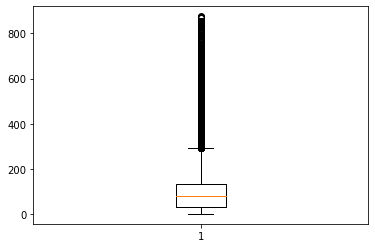

In [69]:
plot_hist('cz_fips')

In [70]:

iqr = np.percentile(f_df['cz_fips'],75)-np.percentile(f_df['cz_fips'],25)
upper_limit = np.percentile(f_df['cz_fips'],75)+1.5 * iqr
lower_limit = np.percentile(f_df['cz_fips'],25)-1.5 * iqr 
f_df = f_df[(f_df['cz_fips']<upper_limit) & (f_df['cz_fips']>lower_limit)]


cz_fips


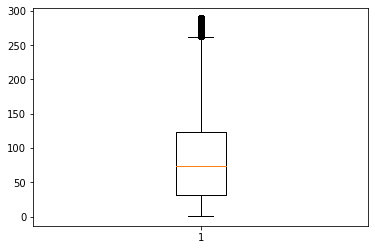

In [71]:
plot_hist('cz_fips')

In [72]:
for item in num.columns:
    plot_hist(item)

NameError: name 'num' is not defined

In [73]:
f_df.head()

,begin_time,state,state_fips,year,month_name,event_type,cz_type,cz_fips,wfo,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,magnitude,magnitude_type,flood_cause,begin_azimuth,end_azimuth,end_lat,location_index,range,latitude,longitude,duration,damage_crops_a
0,1615,ARKANSAS,5,2008,February,Hail,C,127,LZK,0,0,0,0,1.75,EG,Heavy Rain,N,N,34.9300,1,0.00,34.9300,-94.1800,0,0.0
1,1320,ARKANSAS,5,2008,January,Thunderstorm Wind,C,95,LZK,0,0,0,0,50.00,EG,Heavy Rain,N,N,34.6000,1,0.00,34.6000,-91.2000,0,0.0
2,300,ARIZONA,4,2008,January,Flood,C,19,TWC,0,0,0,0,50.00,EG,Heavy Rain,W,W,32.3691,1,37.72,32.3750,-111.0101,0,0.0
3,300,ARIZONA,4,2008,January,Flood,C,19,TWC,0,0,0,0,50.00,EG,Heavy Rain,W,W,32.3691,2,37.47,32.3746,-111.0057,0,0.0
4,300,ARIZONA,4,2008,January,Flood,C,19,TWC,0,0,0,0,50.00,EG,Heavy Rain,W,W,32.3691,3,37.82,32.3661,-111.0131,0,0.0


In [74]:
f_df.shape

(428251, 25)

In [75]:
f_df['event_type'].value_counts().index

Index(['Thunderstorm Wind', 'Flash Flood', 'Hail', 'Flood', 'Tornado',
       'Heavy Rain', 'Lightning', 'Marine Thunderstorm Wind', 'Funnel Cloud',
       'Debris Flow', 'Waterspout', 'Marine High Wind', 'Dust Devil',
       'Marine Hail', 'Marine Strong Wind'],
      dtype='object')

In [76]:
# filter 
Thunderstorm Wind           129809
Flash Flood                 107791
Hail                         87578
Flood                        77377
Tornado                      19849
Marine Thunderstorm Wind     13599

SyntaxError: invalid syntax (1830981533.py, line 2)

In [77]:
f_df = f_df[f_df['event_type'].isin(['Thunderstorm Wind', 'Flash Flood', 'Hail', 'Flood', 'Tornado',
       'Heavy Rain'])]

In [78]:
f_df['event_type'].value_counts()

Thunderstorm Wind    125741
Flash Flood          102875
Hail                  83297
Flood                 76049
Tornado               19014
Heavy Rain             9438
Name: event_type, dtype: int64

In [79]:
f_df.head()

,begin_time,state,state_fips,year,month_name,event_type,cz_type,cz_fips,wfo,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,magnitude,magnitude_type,flood_cause,begin_azimuth,end_azimuth,end_lat,location_index,range,latitude,longitude,duration,damage_crops_a
0,1615,ARKANSAS,5,2008,February,Hail,C,127,LZK,0,0,0,0,1.75,EG,Heavy Rain,N,N,34.9300,1,0.00,34.9300,-94.1800,0,0.0
1,1320,ARKANSAS,5,2008,January,Thunderstorm Wind,C,95,LZK,0,0,0,0,50.00,EG,Heavy Rain,N,N,34.6000,1,0.00,34.6000,-91.2000,0,0.0
2,300,ARIZONA,4,2008,January,Flood,C,19,TWC,0,0,0,0,50.00,EG,Heavy Rain,W,W,32.3691,1,37.72,32.3750,-111.0101,0,0.0
3,300,ARIZONA,4,2008,January,Flood,C,19,TWC,0,0,0,0,50.00,EG,Heavy Rain,W,W,32.3691,2,37.47,32.3746,-111.0057,0,0.0
4,300,ARIZONA,4,2008,January,Flood,C,19,TWC,0,0,0,0,50.00,EG,Heavy Rain,W,W,32.3691,3,37.82,32.3661,-111.0131,0,0.0


In [80]:
f_df = f_df.reset_index(drop = True)

In [81]:
f_df.shape

(416414, 25)

In [82]:
f_df.columns 


Index(['begin_time', 'state', 'state_fips', 'year', 'month_name', 'event_type',
       'cz_type', 'cz_fips', 'wfo', 'injuries_direct', 'injuries_indirect',
       'deaths_direct', 'deaths_indirect', 'magnitude', 'magnitude_type',
       'flood_cause', 'begin_azimuth', 'end_azimuth', 'end_lat',
       'location_index', 'range', 'latitude', 'longitude', 'duration',
       'damage_crops_a'],
      dtype='object')

# Create new clean file  / break it down 
- file is to big to upload to git hub so its best to break the file into 3 pieces 

# Filter the file into 3 pieces  
    # create 3 new csv's  
        # 416414 / 3 = 138804.67
    # can also split it into columns ??? 
    # 25/3 = 8
    
storm_events1 = f_df.filter(items=['begin_time', 'state', 'state_fips', 'year', 'month_name', 'event_type',
       'cz_type', 'cz_fips', 'wfo'] )
storm_events2 = f_df.filter(items=['injuries_direct', 'injuries_indirect',
       'deaths_direct', 'deaths_indirect', 'magnitude', 'magnitude_type',
       'flood_cause', 'begin_azimuth'] )
storm_events3 = f_df.filter(items=['end_azimuth', 'end_lat',
       'location_index', 'range', 'latitude', 'longitude', 'duration',
       'damage_crops_a']) 



In [84]:
# check to see if the break down worked and put the files back together 

In [85]:
storm_events1.head()

,begin_time,state,state_fips,year,month_name,event_type,cz_type,cz_fips,wfo
0,1615,ARKANSAS,5,2008,February,Hail,C,127,LZK
1,1320,ARKANSAS,5,2008,January,Thunderstorm Wind,C,95,LZK
2,300,ARIZONA,4,2008,January,Flood,C,19,TWC
3,300,ARIZONA,4,2008,January,Flood,C,19,TWC
4,300,ARIZONA,4,2008,January,Flood,C,19,TWC


In [86]:
storm_events1.shape

(416414, 9)

In [87]:
storm_events2.head()

,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,magnitude,magnitude_type,flood_cause,begin_azimuth
0,0,0,0,0,1.75,EG,Heavy Rain,N
1,0,0,0,0,50.00,EG,Heavy Rain,N
2,0,0,0,0,50.00,EG,Heavy Rain,W
3,0,0,0,0,50.00,EG,Heavy Rain,W
4,0,0,0,0,50.00,EG,Heavy Rain,W


In [88]:
storm_events2.shape

(416414, 8)

In [90]:
storm_events3.shape

(416414, 8)

# Filter by row 
    - try using loc

In [106]:
storm_events1 = f_df.loc[0:208207] 
storm_events2 = f_df.loc[208208:416414]


In [104]:
#all_= pd.concat([a,b],axis=0) 
#all_.shape

# Make the new csv's  


In [ ]:
# new 

In [108]:
storm_events1.to_csv('/Users/k/Desktop/Storm_type_final_project/clean_csv/storm_events1.csv') 
storm_events2.to_csv('/Users/k/Desktop/Storm_type_final_project/clean_csv/storm_events2.csv') 



In [ ]:
# old below 

storm_events1.to_csv('/Users/k/Desktop/End_Of_Semester_Proj/storm_events1.csv') 
storm_events2.to_csv('/Users/k/Desktop/End_Of_Semester_Proj/storm_events2.csv') 
storm_events3.to_csv('/Users/k/Desktop/End_Of_Semester_Proj/storm_events3.csv') 

In [ ]:
# original whole file 
#f_df.to_csv('/Users/k/Desktop/Final_project_disaster/f_df_clean.csv')
# will overide the original file, be careful how you name your files or you will erase data 